In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [9]:
# Caminho geral do projeto
caminho_pasta = R'C:\ARQUIVOS IMPORTANTES\TRABALHO\EMP\FACUL\trabalho_visualizacao_informacao\dados'
# Dataset Utilizado
arquivo_csv = '\owid-covid-data.csv'
# Ler o CSV e Definir o dataframe
df = pd.read_csv(caminho_pasta + arquivo_csv)

In [10]:
# Verificando as colunas disponiveis
df.columns
# Escolhendo as colunas que serão necessarias
df = df[['iso_code','continent','location','date','new_cases','new_deaths','population']]
# Criando um dict para no proximo step alterar os nomes das colunas
colunas_renomeadas = {
    'continent': 'continente',
    'location': 'pais',
    'date': 'data',
    'new_cases': 'casos',
    'new_deaths': 'mortes',
    'population': 'max_populacao'
    
}
# Alterar os nomes das colunas
df = df.rename(columns = colunas_renomeadas)

In [11]:
# Transformando a coluna data para um datetime valido do pandas
df['data'] = pd.to_datetime(df['data'])
# Criando uma coluna ano_mes, para virar uma categoria de agrupamento
df['ano_mes'] = df['data'].dt.strftime('%Y-%m')
# criando um group by para agrupar as mortes por país
df_total_mortes_pais = df.groupby('pais')['mortes'].sum().reset_index()

# Excluindo os que não são considerados países
valores_indesejados = ['World', 'Upper middle income', 'High income', 'Europe', 'North America', 
                       'Asia', 'Lower middle income', 'South America', 'European Union', 'Africa']

# Filtrar o DataFrame para excluir os valores indesejados da coluna País
df_total_mortes_pais = df_total_mortes_pais[~df_total_mortes_pais['pais'].isin(valores_indesejados)]

In [12]:
# Configurando da data que será inserida no parametro map
data = dict(
    type='choropleth',
    locations=df_total_mortes_pais['pais'],
    locationmode='country names',
    colorscale=['#F8F8F8','yellow', 'orange', 'red'],
    z=df_total_mortes_pais['mortes']
)

# Configurando o layout que será inserida no parametro map
layout = dict(
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    width=1000,  # Largura do gráfico em pixels
    height=800  # Altura do gráfico em pixels
)

map = go.Figure(data=[data], layout=layout)
map.show()

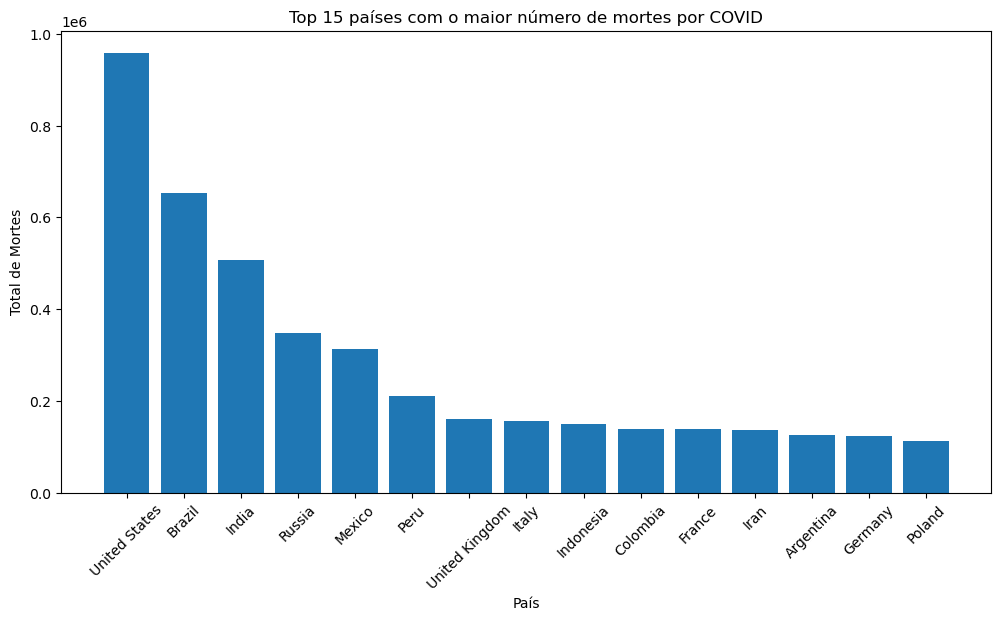

In [13]:
# Ordene os países pelo total de mortes em ordem decrescente e criando um top x
df_top_paises = df_total_mortes_pais.sort_values('mortes', ascending=False).head(15)

# Configurando o tamanho do grafico (Largura e Altura)
plt.figure(figsize=(12, 6))

# Crie o gráfico de barras com os top x
plt.bar(df_top_paises['pais'], df_top_paises['mortes'])

# Rótulos aos eixos x e y
plt.xlabel('País')
plt.ylabel('Total de Mortes')
# Titulo do grafico
plt.title('Top 15 países com o maior número de mortes por COVID')

# Rodar o eixo x para melhorar a visualização
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()


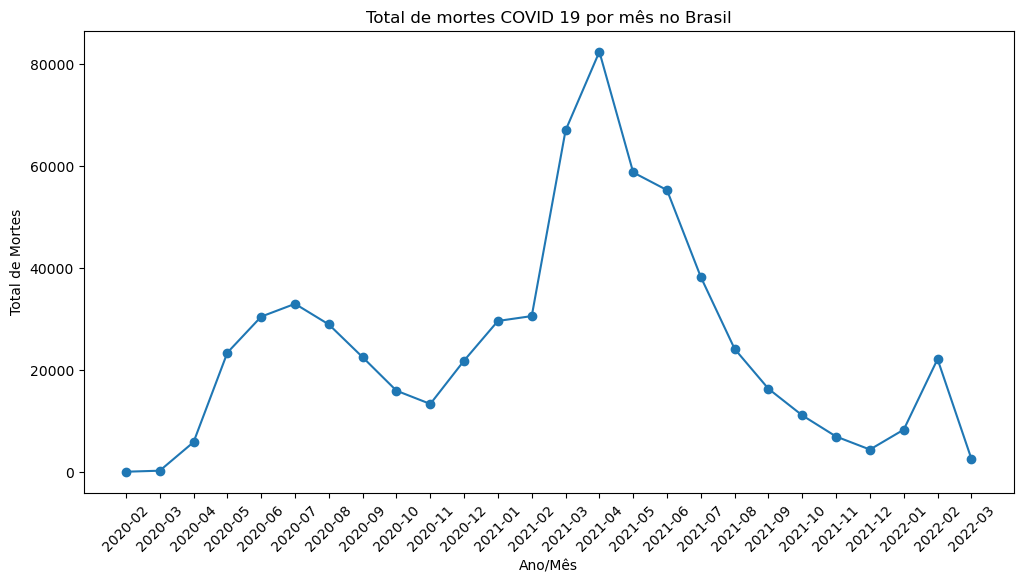

In [15]:
# criando um group by para agrupar as mortes por ano_mes
df_total_mortes_brasil_mes = df[df['iso_code'] == 'BRA'].groupby('ano_mes')['mortes'].sum().reset_index()

# Configurando o tamanho do grafico (Largura e Altura)
plt.figure(figsize=(12, 6))

# Criando um gráfico de linha com os dados agrupados, adicionando uma marca na linha para melhorar a visualização
plt.plot(df_total_mortes_brasil_mes['ano_mes'], df_total_mortes_brasil_mes['mortes'], marker='o')

# Rótulos aos eixos x e y
plt.xlabel('Ano/Mês')
plt.ylabel('Total de Mortes')
# Titulo do grafico
plt.title('Total de mortes COVID 19 por mês no Brasil')

# Rodar o eixo x para melhorar a visualização
plt.xticks(rotation=45)

# Exiba o gráfico
plt.show()